In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
#importing datasets  
data_set= pd.read_csv("/Users/prince/Desktop/Python Codes/Real_fake_news.csv")  
# removing redundant spaces from column names
data_set.columns = list(map(lambda a: a.lstrip(), data_set.columns))
data_set = data_set.drop(columns=['Unnamed: 0','Unnamed: 0.1','target','BinaryTarget'])
data_set.head()
data_set.tail()

,author,statement,source,BinaryNumTarget
4865,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,0
4866,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,0
4867,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,0
4868,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,0
4869,Bill McCarthy,"""Twitter caught leaking Donald Trump’s private...",Bloggers,0


In [4]:
data_set1 = pd.get_dummies(data_set)
data_set1.head()

,BinaryNumTarget,author_Aaron Marshall,author_Aaron Sharockman,author_Adam Thorp,author_Adrianne Uphold,author_Adriel Bettelheim,author_Al Bernardi,author_Alan Gathright,author_Alan Hovorka,author_Alayna Degenhardt,...,source_WrongWayRubio.com,source_Xavier Becerra,source_Yard sign,source_Yes On 62 campaign to abolish California's death penalty,source_YouTube videos,source_YourContent,source_Yvette McGee Brown,source_Zach Wahls,source_Zerlina Maxwell,source_teaparty.org
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data_set1.drop(columns=['BinaryNumTarget'])
y = data_set1['BinaryNumTarget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [6]:
#feature Scaling  
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
y_test

1654    1
1101    1
1149    1
2763    0
3145    0
       ..
2187    1
1538    1
3407    0
1807    1
3938    0
Name: BinaryNumTarget, Length: 1461, dtype: int64

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [8]:
y_pred = knn.predict(X_test)

In [9]:
confusion_matrix(y_test, y_pred)

array([[616,  89],
       [ 72, 684]])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8898015058179329

In [11]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.89534884, 0.88486417]),
 array([0.87375887, 0.9047619 ]),
 array([0.88442211, 0.89470242]),
 array([705, 756]))

In [12]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8848641655886158

In [13]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9047619047619048

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8947024198822761

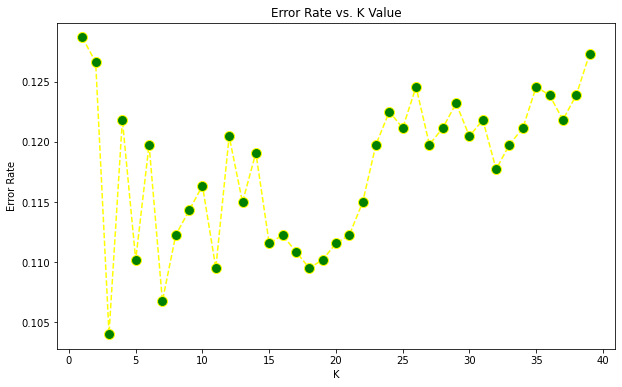

Minimum error:- 0.1040383299110198 at K = 3


In [15]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='yellow', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [17]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8959616700889802